## Deep Learning - MNIST Project

### Step 1: Import Required Libraries
Start by importing the necessary libraries.

In [2]:
!pip install keras

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt


### Step 2: Load and Preprocess the MNIST Dataset
MNIST is a popular dataset for handwritten digit classification. It contains 60,000 training images and 10,000 test images of digits from 0 to 9.

In [44]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


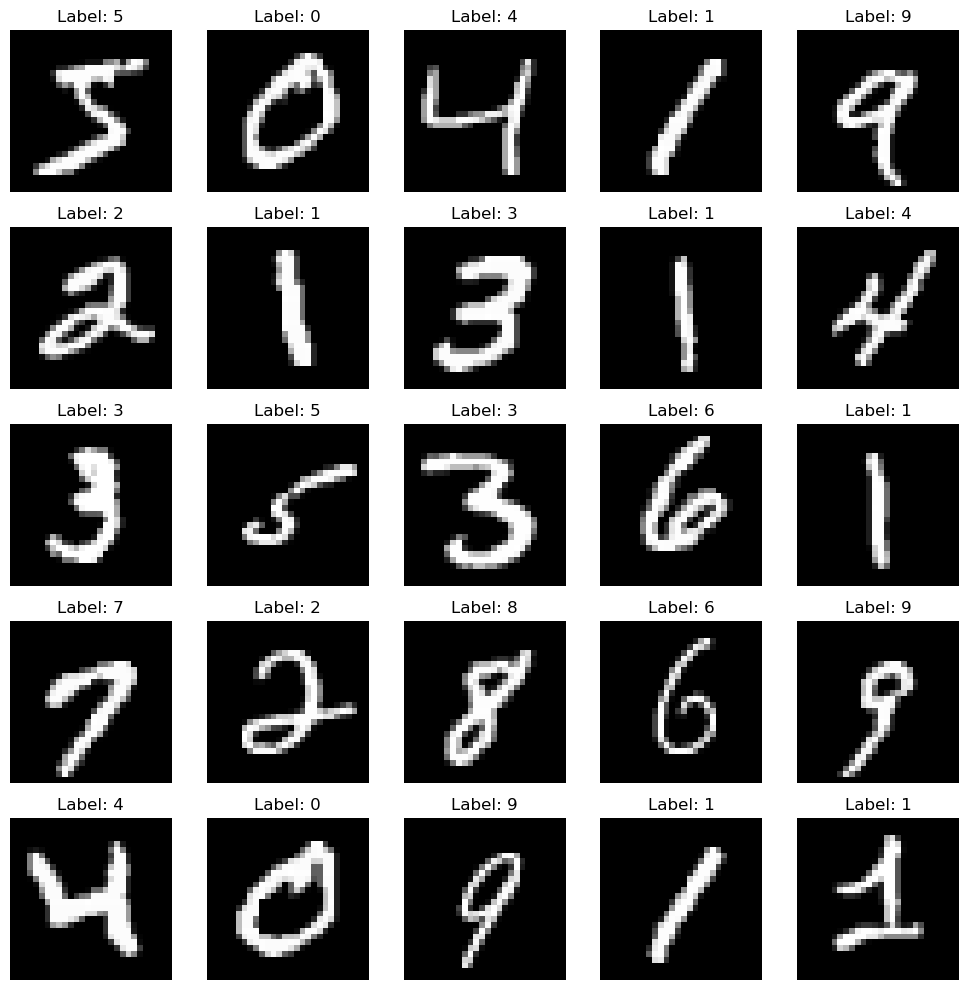

In [5]:
# Function to plot a grid of images
def plot_images(X, y, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)  # Create a 5x5 grid
        plt.imshow(X[i], cmap='gray')  # Display the image in grayscale
        plt.title(f'Label: {y[i].argmax()}')  # Show the corresponding label
        plt.axis('off')  # Hide axes
    plt.tight_layout()
    plt.show()

# Plot the first 25 images
plot_images(X_train, y_train)


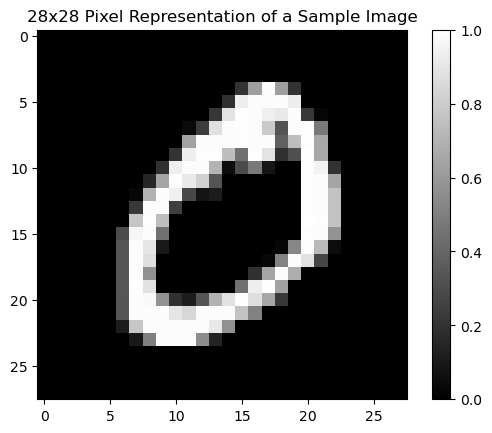

28x28 Pixel Matrix Representation:

0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.20 0.62 0.99 0.62 0.20 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.19 0.93 0.99 0.99 0.99 0.93 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.21 0.89 0.99 0.99 0.94 0.91 0.99 0.22 0.02 0.00 0.00 0.00

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Select a sample image (first image in the dataset for this example)
sample_image = X_train[1]  # Ensure X_train is loaded and processed as per previous steps

# Display the image as a 28x28 pixel matrix
plt.imshow(sample_image, cmap='gray')
plt.title("28x28 Pixel Representation of a Sample Image")
plt.colorbar()  # Show color scale for reference
plt.show()

# Print the 28x28 pixel matrix with each row on a single line, without line breaks within the row
print("28x28 Pixel Matrix Representation:\n")
for row in sample_image:
    formatted_row = " ".join(f"{pixel:.2f}" for pixel in row)  # Formatting to two decimal places for readability
    print(formatted_row)


### Step 3: Building the Model
Let's create a simple neural network with an input layer, one hidden layer, and an output layer. Each layer has parameters (weights and biases) that are adjusted during training.

- Weights and Biases: Weights control the strength of the connections between neurons, while biases allow the activation to shift, giving the network flexibility to fit the data.
- Activation Function: This introduces non-linearity, helping the model to learn complex patterns.

In [18]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into a 1D array
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons for each class
])


/opt/conda/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Define the ReLU Function

The ReLU (Rectified Linear Unit) function is an activation function commonly used in neural networks, especially in hidden layers. Its purpose is to introduce non-linearity into the model, allowing it to learn complex patterns in data. The ReLU function is defined as:

f(x)=max(0,x)
In other words, it outputs the input directly if it's positive; otherwise, it outputs zero. This helps the model to focus only on positive values and ignore negative values, which aids in faster and more efficient training.

Let's break down how ReLU works by applying it to the pixel values of an MNIST image.


Here’s a simple function in Python to perform the ReLU transformation on an array of values:

In [24]:
import numpy as np

def relu(x):
    return np.maximum(0, x)


### Apply ReLU to an MNIST Image
To see how the ReLU function transforms pixel values in an MNIST image, we can apply it to the pixel values of a sample image. We'll take an image from the MNIST dataset, flatten it (since we’ll apply ReLU on individual pixel values), and apply the relu function.

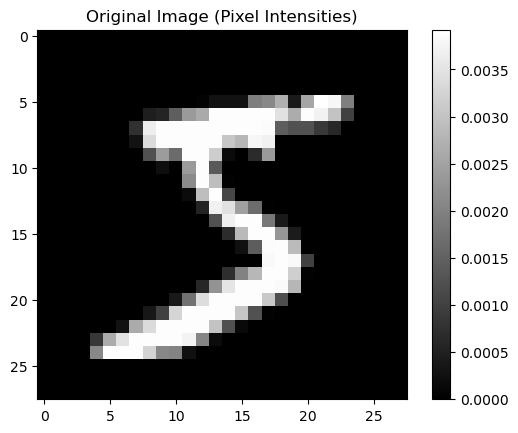

In [26]:

sample_image = X_train[0] / 255.0  # Normalize pixel values to [0, 1] range

# Display the original image
plt.imshow(sample_image, cmap='gray')
plt.title("Original Image (Pixel Intensities)")
plt.colorbar()
plt.show()

# Flatten the image for easier processing (28x28 -> 784)
flattened_image = sample_image.flatten()


In [28]:
flattened_image

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

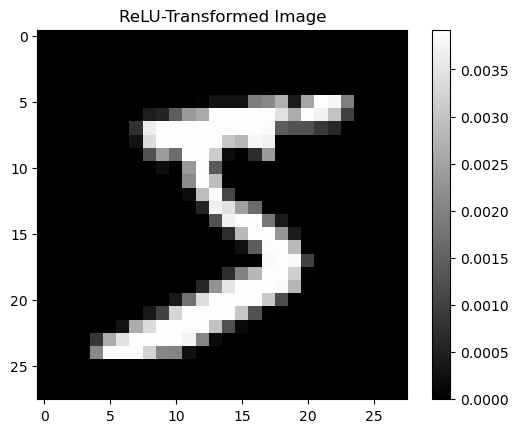

In [27]:
# Apply ReLU function to the flattened image
relu_transformed_image = relu(flattened_image)

# Reshape back to 28x28 for visualization
relu_image_reshaped = relu_transformed_image.reshape(28, 28)

# Display the ReLU-transformed image
plt.imshow(relu_image_reshaped, cmap='gray')
plt.title("ReLU-Transformed Image")
plt.colorbar()
plt.show()


In [29]:
relu_transformed_image

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [33]:
if relu_transformed_image.all()==flattened_image.all():
    print("Same")

Same


### Understanding Softmax with Code

The softmax function is an activation function typically used in the output layer of a classification neural network. It converts raw output scores (also called logits) from the network into probabilities, which sum to 1 across all output classes. This is particularly useful for multi-class classification tasks, such as classifying MNIST digits (0 through 9).

The softmax function is defined as:

N is the number of classes. The function exponentiates each score, making all values positive, and then normalizes them by dividing by the sum of all exponentiated values. This produces a probability distribution across the classes.


Let's break down the softmax function and apply it to a sample array to see how it transforms raw scores into probabilities. Note that applying softmax directly to MNIST pixel values doesn’t make much sense, as softmax is typically applied to the output scores of a neural network. However, for educational purposes, I'll demonstrate how softmax works on some random values.

Step 1: Define the Softmax Function
Here’s a Python implementation of the softmax function:

In [34]:
import numpy as np

def softmax(logits):
    # Exponentiate the logits
    exp_values = np.exp(logits - np.max(logits))  # Subtracting max for numerical stability
    # Normalize by dividing by the sum of all exponentiated values
    probabilities = exp_values / np.sum(exp_values)
    return probabilities


**Explanation**
- Exponentiate Each Value: The function first exponentiates each value in logits using np.exp(logits). This step makes all values positive and amplifies differences between them.
- Numerical Stability: Subtracting np.max(logits) before exponentiating prevents overflow issues, ensuring that very large or small values do not lead to numerical instability.
- Normalization: Each exponentiated value is then divided by the sum of all exponentiated values, converting them into probabilities that add up to 1.

### Step 2: Apply Softmax to Example Logits
Let's assume we have an array of raw scores (logits) that a neural network might output for a single MNIST digit. We’ll apply softmax to these scores.

In [35]:
# Example logits (random scores that a neural network might output)
logits = np.array([2.0, 1.0, 0.1])

# Apply softmax to get probabilities
probabilities = softmax(logits)

print("Logits:", logits)
print("Probabilities after Softmax:", probabilities)
print("Sum of Probabilities:", np.sum(probabilities))


Logits: [2.  1.  0.1]
Probabilities after Softmax: [0.65900114 0.24243297 0.09856589]
Sum of Probabilities: 1.0


### Step 4: Compile the Model
Here, we define the optimizer, loss function, and evaluation metric.

- Optimizer: adam adjusts the weights and biases based on the gradient of the loss function.
- Loss Function: categorical_crossentropy is used for multi-class classification.
- Metrics: accuracy helps track how well the model performs on training and testing data.


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Step 5: Train the Model
Training involves feeding the data to the model in small batches and adjusting the weights and biases to minimize the loss. This is done using backpropagation, where the model calculates the error, computes gradients of the loss with respect to each parameter, and updates them accordingly.

In [20]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5


2024-11-08 01:32:51.726508: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8701 - loss: 0.4597

2024-11-08 01:32:58.797244: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8702 - loss: 0.4592 - val_accuracy: 0.9569 - val_loss: 0.1498
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9602 - loss: 0.1377 - val_accuracy: 0.9660 - val_loss: 0.1130
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9733 - loss: 0.0899 - val_accuracy: 0.9679 - val_loss: 0.1081
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9797 - loss: 0.0680 - val_accuracy: 0.9756 - val_loss: 0.0861
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9865 - loss: 0.0465 - val_accuracy: 0.9740 - val_loss: 0.0883


In [23]:
# Accessing weights and biases
for layer in model.layers:
    weights_biases = layer.get_weights()
    if weights_biases:  # Check if the layer has weights and biases
        weights, biases = weights_biases
        print(f"Layer: {layer.name}")
        print("Weights:")
        print(weights)
        print("Biases:")
        print(biases)
        print("-" * 50)
    else:
        print(f"Layer: {layer.name} has no weights or biases.")


Layer: flatten has no weights or biases.
Layer: dense
Weights:
[[-0.03002578 -0.03273189  0.06731249 ...  0.07875805 -0.05955245
  -0.0437245 ]
 [ 0.00678809 -0.07179464  0.06449351 ...  0.04756019 -0.07005781
   0.027751  ]
 [-0.05073697  0.03843483  0.01178621 ... -0.06956773  0.07058615
  -0.05451685]
 ...
 [-0.04869786 -0.07331701 -0.04524479 ... -0.04120696 -0.04840139
  -0.07274614]
 [ 0.03266614 -0.04392215 -0.01742621 ...  0.0264074  -0.02464158
   0.05979755]
 [ 0.07658651 -0.05829646  0.05160039 ... -0.06303408 -0.03711113
   0.01085801]]
Biases:
[ 0.0367391  -0.04009224 -0.031734   -0.11107852 -0.00625972 -0.0354213
  0.00862242  0.09334359  0.03815603  0.02679045 -0.01706086  0.08055719
 -0.00419574  0.05852973  0.0098496   0.03548517  0.07170559 -0.04665348
  0.02699028  0.07341178  0.04309137 -0.02941537  0.00639991 -0.02093036
 -0.08806731  0.09138249  0.13035522  0.04930692  0.1294607  -0.01538045
  0.06571094  0.06056991  0.11172824  0.07116319 -0.00895454 -0.00642303


### Step 6: Evaluate the Model
After training, evaluate the model on the test set to see how it generalizes to new data.

In [36]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


  1/313 ━━━━━━━━━━━━━━━━━━━━ 46s 148ms/step - accuracy: 1.0000 - loss: 0.0183

2024-11-08 01:49:26.456838: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.0906
Test Loss: 0.08040205389261246
Test Accuracy: 0.975600004196167


### Step 7: Visualize Training and Validation Accuracy
Plot the accuracy over the training epochs to understand how well the model learned.



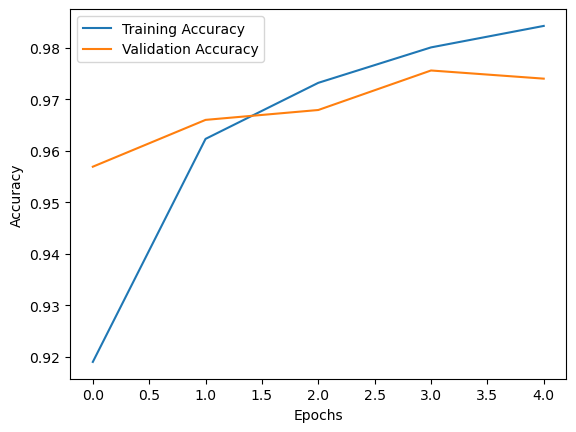

In [37]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plota(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Identify Incorrect Predictions
After training, we can use the model to make predictions on the test set. We then compare these predictions with the true labels and collect the indices of the incorrect predictions.

In [48]:
# Ensure y_true is in integer format by converting one-hot encoded y_test
y_true = np.argmax(y_test, axis=1)           # Convert true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)    # Convert predicted probabilities to class labels

# Identify incorrect predictions using a list comprehension
incorrect_indices = [i for i in range(len(y_true)) if y_pred_classes[i] != y_true[i]]


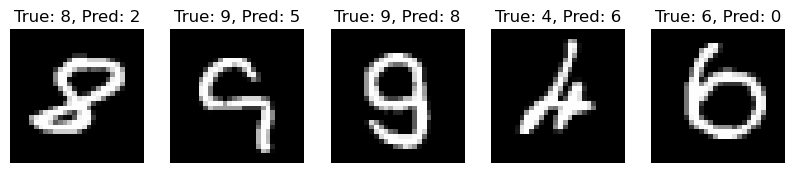

In [49]:
# Number of images to display
num_images = 5

# Plot a few incorrect predictions
plt.figure(figsize=(10, 10))
for i, idx in enumerate(incorrect_indices[:num_images]):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.show()


### Softmax Calculation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Logits: [8.2699074e-08 1.1910563e-09 4.3924936e-07 3.5079080e-05 2.8170515e-11
 1.7931999e-08 1.4301371e-13 9.9996412e-01 7.5313594e-08 2.9597916e-07]
Probabilities after Softmax: [0.0853372  0.08533719 0.08533723 0.08534018 0.08533719 0.08533719
 0.08533719 0.2319622  0.0853372  0.08533721]
Predicted Class: 7
True Class: 7


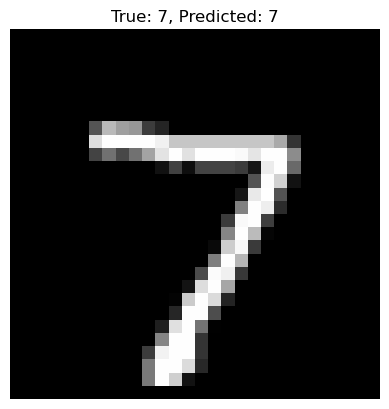

In [50]:
# Select one image from the test set
image = X_test[0]  # First image in the test set
true_label = np.argmax(y_test[0])  # True label in integer form

# Reshape the image for prediction and make a prediction
image = np.expand_dims(image, axis=0)  # Add batch dimension
logits = model.predict(image)  # Get raw output (logits) from the model
logits = logits[0]  # Remove batch dimension for simplicity

# Apply softmax to the logits to get class probabilities
def softmax(x):
    exp_values = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_values / np.sum(exp_values)

probabilities = softmax(logits)

# Predicted class is the one with the highest probability
predicted_class = np.argmax(probabilities)

# Print the results
print("Logits:", logits)
print("Probabilities after Softmax:", probabilities)
print("Predicted Class:", predicted_class)
print("True Class:", true_label)

# Display the image with predicted and true labels
plt.imshow(X_test[0], cmap='gray')
plt.title(f"True: {true_label}, Predicted: {predicted_class}")
plt.axis('off')
plt.show()

In [52]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


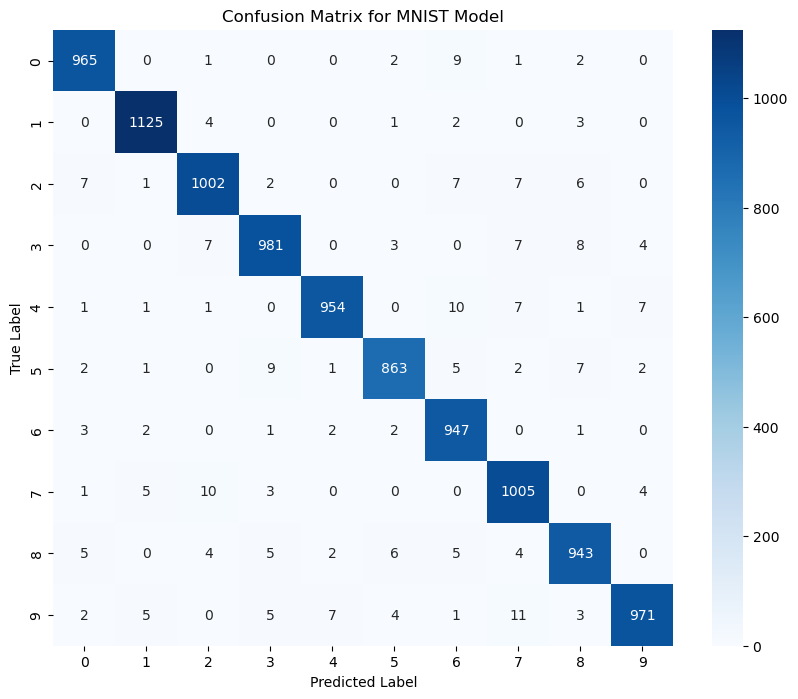

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = np.argmax(y_test, axis=1)           # Convert true labels to class labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MNIST Model")
plt.show()


### Explanation of the Code
Make Predictions: model.predict(X_test) gives the probability distribution for each class. We use np.argmax(y_pred, axis=1) to get the predicted class labels and np.argmax(y_test, axis=1) to get the true labels.

Generate Confusion Matrix: We use confusion_matrix(y_true, y_pred_classes) to compute the confusion matrix. Each row represents the true class, and each column represents the predicted class.

Plot the Confusion Matrix: We use seaborn.heatmap to plot the confusion matrix. The annot=True option displays the numbers in each cell, and fmt="d" ensures integer formatting.

### Interpreting the Confusion Matrix
Diagonal Values: These represent correctly classified instances. Higher numbers here indicate better model accuracy.
Off-Diagonal Values: These represent misclassified instances. Higher numbers here can indicate areas where the model is struggling (e.g., confusing certain digits with each other).
This confusion matrix provides insight into which classes are being correctly classified and which ones are commonly misclassified. Let me know if you have further questions or need additional explanation!